# Sprint24課題 ゲート付きリカレントニューラルネットワーク

## 1.この課題の目的

- 発展的なRNNの手法を理解する

## 2.KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーが用意されている。
今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指す。

以下のドキュメントにまとめられている。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

次の11個の項目があります。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

## 【問題1】各種手法の実行

Keras公式のサンプルをスタートコードとする。

これを元に、上記11個の項目全てを使用すること。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行える。
そういった関係を見つけて比較すること。

なお、ConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできない。

<font color="blue">LSTMのサンプルコード</font>

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

<font color="blue">ConvLSTM2Dのサンプルコード</font>

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
#!pip3 uninstall numpy -y
#!pip3 install numpy==1.16.2

Uninstalling numpy-1.16.4:
  Successfully uninstalled numpy-1.16.4
     |████████████████████████████████| 17.3MB 3.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, BatchNormalization
from keras.layers import RNN, SimpleRNN, GRU, LSTM, SimpleRNNCell, GRUCell, LSTMCell, StackedRNNCells, CuDNNGRU, CuDNNLSTM, ConvLSTM2D, Reshape, Flatten, Dropout
from keras.datasets import imdb
from keras import backend as K
from keras.backend import tensorflow_backend as backend

import time

In [2]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [3]:
UNITS = 128
EPOCH = 3

layer_name = ["SimpleRNN", "GRU", "LSTM", "CuDNNGRU", "CuDNNLSTM"]

cell_names = ["SimpleRNNCell", "GRUCell", "LSTMCell","MixedCell"]

# layers
layers = {"SimpleRNN":keras.layers.SimpleRNN(UNITS, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False),
                 "GRU":keras.layers.GRU(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, reset_after=False),
                 "LSTM":keras.layers.LSTM(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False),
                 "CuDNNGRU":CuDNNGRU(UNITS, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False),
                 "CuDNNLSTM":CuDNNLSTM(UNITS, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)}

W0630 03:43:21.379490 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
mixed_cells = [SimpleRNNCell(UNITS, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0),
                          GRUCell(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1),
                          LSTMCell(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)]


cells = {"SimpleRNNCell" : SimpleRNNCell(UNITS, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0),
             "GRUCell" : GRUCell(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1),
             "LSTMCell":LSTMCell(UNITS, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1),
             "MixedCell":StackedRNNCells(mixed_cells)}

### Layer

以下の5レイヤーについて学習・評価を行う。

1. SimpleRNN
2. GRU
3. LSTM
4. CuDNNGRU
5. CuDNNLSTM

In [5]:
results = {}

for name in layer_name:
    
    # 処理前の時刻
    t1 = time.time()

    # 学習・予測
    print('Build {} ...'.format(name))
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(layers[name])
    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    model.summary()
    
    print('Train...')
    history = model.fit(x_train, y_train, batch_size=batch_size,
                                      epochs=EPOCH, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

    print('Test score:', score)
    print('Test accuracy:', acc)

    # 処理後の時刻
    t2 = time.time()

    # 経過時間を表示
    elapsed_time = t2 - t1
    print(f"経過時間：{elapsed_time}")
    print("")

    # 結果を格納
    results[name] = {"time":round(elapsed_time, 2), "score" : round(score,2), "accuracy" : round(acc,2)}
    
    # セッション終了
    backend.clear_session()

W0630 03:43:21.458705 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 03:43:21.468638 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build SimpleRNN ...


W0630 03:43:21.587354 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 03:43:21.609414 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0630 03:43:21.615403 140538127951744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
Train...


W0630 03:43:21.922169 140538127951744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6317 - acc: 0.6176 - val_loss: 0.5972 - val_acc: 0.6809
Epoch 2/3
25000/25000 [==============================] - 26s 1ms/step - loss: 0.5324 - acc: 0.7287 - val_loss: 0.5823 - val_acc: 0.6845
Epoch 3/3
25000/25000 [==============================] - 5s 192us/step
Test score: 0.5330192252349853
Test accuracy: 0.75256
経過時間：87.95338916778564

Build GRU ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
N

In [6]:
results

{'CuDNNGRU': {'accuracy': 0.83, 'score': 0.46, 'time': 33.35},
 'CuDNNLSTM': {'accuracy': 0.82, 'score': 0.45, 'time': 29.63},
 'GRU': {'accuracy': 0.83, 'score': 0.45, 'time': 251.05},
 'LSTM': {'accuracy': 0.83, 'score': 0.49, 'time': 309.1},
 'SimpleRNN': {'accuracy': 0.75, 'score': 0.53, 'time': 87.95}}

#### RNNCells

- SimpleRNNCell
- GRUCell
- LSTMCell
- MixedCell：StackedRNNCells

In [7]:
for cell_name in cell_names:
    
    print("cell_name:", cell_name)

    # 学習・予測
    print('Build {} ...'.format(cell_name))
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(keras.layers.RNN(cells[cell_name]))
    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
    model.summary()
    
    # 処理前の時刻
    t1 = time.time()
    
    print('Train...')
    model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=EPOCH, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

    print('Test score:', score)
    print('Test accuracy:', acc)

    # 処理後の時刻
    t2 = time.time()

    # 経過時間を表示
    elapsed_time = t2 - t1
    print(f"経過時間：{elapsed_time}")
    print("")
    
    # 結果を格納
    results[cell_name] = {"time":round(elapsed_time, 2), "score" : round(score,2), "accuracy" : round(acc,2)}
    
    # 処理終了時にセッションクローズ
    backend.clear_session()
    

cell_name: SimpleRNNCell
Build SimpleRNNCell ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
rnn_1 (RNN)                  (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 27s 1ms/step - loss: 0.5974 - acc: 0.6612 - val_loss: 0.4819 - val_acc: 0.7797
Epoch 2/3
25000/25000 [==============================] - 27s 1ms/step - loss: 0.4107 - acc: 0.8176 - val_loss: 0.4714 - val_acc: 0.7840
Epoch 3/3
25000/

In [8]:
results

{'CuDNNGRU': {'accuracy': 0.83, 'score': 0.46, 'time': 33.35},
 'CuDNNLSTM': {'accuracy': 0.82, 'score': 0.45, 'time': 29.63},
 'GRU': {'accuracy': 0.83, 'score': 0.45, 'time': 251.05},
 'GRUCell': {'accuracy': 0.83, 'score': 0.45, 'time': 257.76},
 'LSTM': {'accuracy': 0.83, 'score': 0.49, 'time': 309.1},
 'LSTMCell': {'accuracy': 0.83, 'score': 0.47, 'time': 315.46},
 'MixedCell': {'accuracy': 0.81, 'score': 0.42, 'time': 563.25},
 'SimpleRNN': {'accuracy': 0.75, 'score': 0.53, 'time': 87.95},
 'SimpleRNNCell': {'accuracy': 0.65, 'score': 0.62, 'time': 86.3}}

### ConvLSTM2D（入力：IMDB）

In [9]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train_conv, y_train_conv), (x_test_conv, y_test_conv) = imdb.load_data(num_words=max_features)
print(len(x_train_conv), 'train sequences')
print(len(x_test_conv), 'test sequences')

print('Pad sequences (samples x time)')
x_train_conv = sequence.pad_sequences(x_train_conv, maxlen=maxlen)
x_test_conv = sequence.pad_sequences(x_test_conv, maxlen=maxlen)
print('x_train_conv shape:', x_train_conv.shape)
print('x_test_conv shape:', x_test_conv.shape)
print('y_train_conv shape:', y_train_conv.shape)
print('y_test_conv shape:', y_test_conv.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train_conv shape: (25000, 80)
x_test_conv shape: (25000, 80)
y_train_conv shape: (25000,)
y_test_conv shape: (25000,)


- 正解データが1次元配列である点に注意。軸を足す必要がある。

In [0]:
x_train_conv = x_train_conv.reshape(25000,80,1,1,1)
x_test_conv = x_test_conv.reshape(25000,80,1,1,1)
y_train_conv = y_train_conv.reshape(25000, 1)
y_test_conv = y_test_conv.reshape(25000,1)

In [0]:
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [12]:
# モデルの構築

model = Sequential()

model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(80, 1, 1,1),
                   padding='same', return_sequences=True))

model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

W0630 04:15:41.860887 140538127951744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 80, 1, 1, 40)      59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 1, 1, 40)      160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 1, 1, 40)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               320100    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 379,561
Trainable params: 379,481
Non-trainable params: 80
_________________________________________________________________


In [13]:
print("x_train_conv.shape:", x_train_conv.shape)
print("")

# 処理前の時刻
t1 = time.time()

print('Train...')
model.fit(x_train_conv, y_train_conv, batch_size=batch_size,
               epochs=EPOCH, validation_data=(x_test_conv, y_test_conv))

score, acc = model.evaluate(x_test_conv, y_test_conv, batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")
print("")

# 結果を格納
results["conv2lstm_imdb"] = {"time":round(elapsed_time, 2), "score" : round(score,2), "accuracy" : round(acc,2)}

# 処理終了時にセッションクローズ
backend.clear_session()

x_train_conv.shape: (25000, 80, 1, 1, 1)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 179s 7ms/step - loss: 0.7173 - acc: 0.5326 - val_loss: 0.6886 - val_acc: 0.5422
Epoch 2/3
25000/25000 [==============================] - 177s 7ms/step - loss: 0.6902 - acc: 0.5433 - val_loss: 0.7854 - val_acc: 0.5254
Epoch 3/3
25000/25000 [==============================] - 47s 2ms/step
Test score: 0.7113242695999146
Test accuracy: 0.52452
経過時間：579.5503726005554



In [14]:
results

{'CuDNNGRU': {'accuracy': 0.83, 'score': 0.46, 'time': 33.35},
 'CuDNNLSTM': {'accuracy': 0.82, 'score': 0.45, 'time': 29.63},
 'GRU': {'accuracy': 0.83, 'score': 0.45, 'time': 251.05},
 'GRUCell': {'accuracy': 0.83, 'score': 0.45, 'time': 257.76},
 'LSTM': {'accuracy': 0.83, 'score': 0.49, 'time': 309.1},
 'LSTMCell': {'accuracy': 0.83, 'score': 0.47, 'time': 315.46},
 'MixedCell': {'accuracy': 0.81, 'score': 0.42, 'time': 563.25},
 'SimpleRNN': {'accuracy': 0.75, 'score': 0.53, 'time': 87.95},
 'SimpleRNNCell': {'accuracy': 0.65, 'score': 0.62, 'time': 86.3},
 'conv2lstm_imdb': {'accuracy': 0.52, 'score': 0.71, 'time': 579.55}}

### ConvLSTM2D（入力：MNIST）

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
x_train  = x_train.reshape(60000, 28,28)
x_test   = x_test.reshape(10000, 28,28)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
x_train = x_train.reshape(60000, 1, 28, 28,1)
x_test = x_test.reshape(10000, 1, 28, 28, 1)

y_train.shape

(60000, 10)

In [17]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

model = Sequential()

model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(1, 28, 28, 1),
                   padding='same', return_sequences=True))

model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 28, 28, 40)     59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 28, 28, 40)     160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 28, 28, 40)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31360)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3136100   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 3,196,470
Trainable params: 3,196,390
Non-trainable params: 80
_________________________________________________________________

In [19]:
# 処理前の時刻
t1 = time.time()

# 学習
model.fit(x_train, y_train,  
            batch_size=batch_size,
            epochs=EPOCH,   
            verbose=1,         
            validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")
print("")

# 結果を格納
results["conv2lstm_mnist"] = {"time":round(elapsed_time, 2), "score" : round(score,2), "accuracy" : round(acc,2)}

# 処理終了時にセッションクローズ
backend.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 31s 511us/step - loss: 0.2087 - acc: 0.9401 - val_loss: 0.1234 - val_acc: 0.9603
Epoch 2/3
60000/60000 [==============================] - 31s 510us/step - loss: 0.0768 - acc: 0.9770 - val_loss: 0.0676 - val_acc: 0.9799
Epoch 3/3
10000/10000 [==============================] - 1s 149us/step
Test score: 0.08756815353274433
Test accuracy: 0.9786
経過時間：93.4403464794159



In [20]:
results

{'CuDNNGRU': {'accuracy': 0.83, 'score': 0.46, 'time': 33.35},
 'CuDNNLSTM': {'accuracy': 0.82, 'score': 0.45, 'time': 29.63},
 'GRU': {'accuracy': 0.83, 'score': 0.45, 'time': 251.05},
 'GRUCell': {'accuracy': 0.83, 'score': 0.45, 'time': 257.76},
 'LSTM': {'accuracy': 0.83, 'score': 0.49, 'time': 309.1},
 'LSTMCell': {'accuracy': 0.83, 'score': 0.47, 'time': 315.46},
 'MixedCell': {'accuracy': 0.81, 'score': 0.42, 'time': 563.25},
 'SimpleRNN': {'accuracy': 0.75, 'score': 0.53, 'time': 87.95},
 'SimpleRNNCell': {'accuracy': 0.65, 'score': 0.62, 'time': 86.3},
 'conv2lstm_imdb': {'accuracy': 0.52, 'score': 0.71, 'time': 579.55},
 'conv2lstm_mnist': {'accuracy': 0.98, 'score': 0.09, 'time': 93.44}}

## 【問題2】比較結果の説明

11の項目それぞれがどういうものなのかを説明すること。（また、比較した結果を表やグラフで載せること）

今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」と仮定する。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### 結果の可視化

In [21]:
df = pd.DataFrame(results).T
df

,accuracy,score,time
SimpleRNN,0.75,0.53,87.95
GRU,0.83,0.45,251.05
LSTM,0.83,0.49,309.10
CuDNNGRU,0.83,0.46,33.35
CuDNNLSTM,0.82,0.45,29.63
SimpleRNNCell,0.65,0.62,86.30
GRUCell,0.83,0.45,257.76
LSTMCell,0.83,0.47,315.46
MixedCell,0.81,0.42,563.25
conv2lstm_imdb,0.52,0.71,579.55


In [0]:
# 値を抽出
acc = df["accuracy"].values[0]
elapsed_time = df["time"].values[0]
score = df["score"].values[0]
model_name = df.index

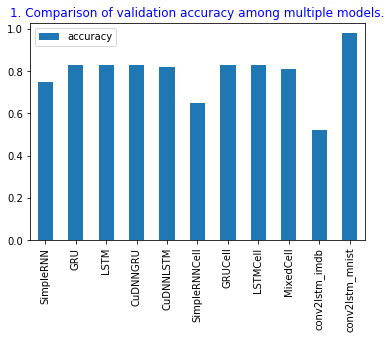

In [89]:
df.plot(kind="bar", y="accuracy")
plt.title("1. Comparison of validation accuracy among multiple models.", color="b")
plt.show()

#### 考察

- conv2lstm以外：SimRNNが若干精度で見劣りするものの、他のモデルは予測精度が概ね0.8前後で均衡している。

- conv2lstm：インプットデータにimdbとmnistを使用した場合で、accuracyに乖離が見られる。
  - imdbは試しにモデルに無理矢理インプットしたのみで、embedding等の前処理を行っていないため精度が出ていないと思われる。
  - 一方、mnistについては、正規化を含む前処理を実行したことも高精度の一因と思われる。

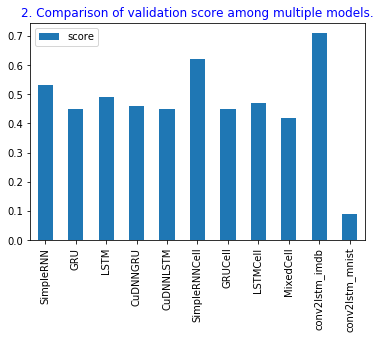

In [90]:
df.plot(kind="bar", y="score")
plt.title("2. Comparison of validation score among multiple models.", color="b")
plt.show()

#### 考察

- conv2lstm以外：SimRNNが若干見劣りするものの、他のモデルはvalidation_score（損失）が概ね0.4〜0.5で均衡している。

- conv2lstm：
  - imdbを用いた場合は、validation_scoreが0.7と高止まりしている。
  - mnistを用いた場合は、validation_scoreが下がっており、学習が進んでいる。

Text(0.5, 1.0, '3. Comparison of time spent on learning among multiple models.')

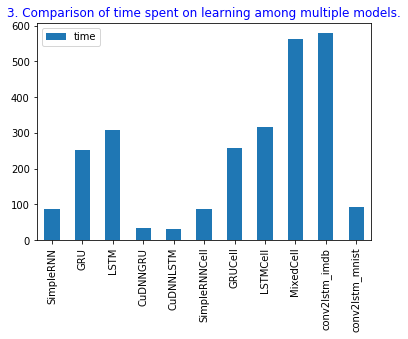

In [25]:
df.plot(kind="bar", y="time")
plt.title("3. Comparison of time spent on learning among multiple models.", color="b")

#### 考察

- conv2lstm以外：
  - CuDNN系（CuDNNGRU、CuDNNLSTM）の学習所要時間が最も少ない。
  - Cell系の横比較では、SimpleRNNCellが最もMixedcellのみ3つのcellを組み合わせており、その分所要時間がかかっている。

- conv2lstm：
  - （単純な横比較はできないが）MNISTを用いた際は、SimpleRNN並の速度で学習が行われている。
  - （同様に単純な横比較はできないが）同じLSTM系でも、LSTMやLSTMCellよりconv2LSTMのほうが早い。

### 1. RNN

- Recurrentレイヤーに対する基底クラス。

- 引数にcellクラスを渡すことで、任意のRNNを生成することができる。

### 2. SimpleRNN

- 出力が入力にフィードバックされる全結合RNN．

  - つまり、SimpleRNNCellで構成されたRNNクラスであり、SimpleRNNCelは各シーケンス($t$)において外部の入力($x$)に、前時刻の状態($h_{t-1}$)、及びバイアス($b$)を加算した値を入力として状態($h_t$)を算出する。
  - 算出された状態$h_t$は、外部に出力されると共に、次時刻$t+1$の状態を算出する際の入力として用いられる。

### 3. GRU

- ゲートのあるリカレントユニット
  - ゲートとは入出力の調整弁を意味する。
  - 具体的には入力値をシグモイド関数等で評価した「入力に対する重み」を表し、入力値と重みのアダマール積が計算される。
  - 重みは入力値に比例することから、大きな入力値のみを入力として扱われる（＝値の小さな入力は重要性が低いと判断して捨象する）。


### 4. LSTM

- LSTMCellsで構成される、長短期記憶ユニットを有するRNN。
  - 長短期記憶（Long short term memory）とは、シーケンス$t$で算出された状態($h_t$：短期記憶）を最後のシーケンス($T$)まで保持する
  （＝短期記憶の長期保時）ことを意味する。
  - 具体的に、長短期記憶とは、シーケンス$t$までの状態($h_t$)の累積和$C_t（t=1,...T）$である。
  - これにより、RNNの課題である勾配爆発、消失問題が解消される
  - 尚、LSTMは以下3種類のゲートを有する。
    1. Input Gate：（Affine変換後の）入力に対する重み
    3. Output Gate：出力に対する重み
    2. Forget Gate（LSTMの場合）：長短期記憶
    

### 5. ConvLSTM2D

- 畳み込みLSTM．

- LSTMレイヤーに似ているが，入力の変換とリカレントな変換が畳み込み．

### 6. SimpleRNNCell

- SimpleRNNのCellクラス．
  - RNNクラスの引数に用いる。

### 7. GRUCell

- GRUレイヤーのためのCellクラス．
  - - RNNクラスの引数に用いる。

### 8. LSTMCell

- LSTMレイヤーのためのcellクラス．
  - RNNクラスの引数に用いる。
  - LSTMセルを有しており、シーケンス$t$における状態を累積、保持する。
  

### 9. StackedRNNCells

- RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．

- 効率的なstacked RNNを実装するために使われる．

### 10. CuDNNGRU

- GRUと同様のアーキテクチャを持つRNN。
- NVIDIAが開発したプログラミング言語（CuDNN）を利用しており、高速に処理できる。 
- TensorFlowバックエンドでGPU上でのみ動作する．

### 11. CuDNNLSTM

- LSTMと同様のアーキテクチャを持つRNN。
- NVIDIAが開発したプログラミング言語（CuDNN）を利用しており、高速に処理できる。
- TensorFlowバックエンドでGPU上でのみ動作する．


## 【問題3】（アドバンス課題）複数のデータセット間での比較

単一のデータセットでの実験に留めず、他のデータセットでも実験する。

- [データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

- Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤートピックス分類がある。（IMDBは2値分類であったが、こちらは46値分類の問題）

In [26]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=maxlen,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [27]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  11,   84,   15, 2020,  730,    4,   14,    2,   33,   20,   25,
          24,    6,   22,    7,    1,   60,    6,   17,  130,   73,    8,
           1,    5,   25,   12,    1,    3,    4,    7,    6,    5,    6,
          20,    3,   12,    5,    6,   10,    6,    3,    2,    6,    7,
           5]))

- 学習用データの分布に偏りがあり、正解ラベル3, 4が太宗を占める。
- 結果、モデルが一部の正解値に対して過剰適合する可能性あり。


In [28]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        38, 39, 40, 41, 43, 44]),
 array([  4,  21,   6, 521, 160,   1,   3,   1,  12,   1,   8,   5,   6,
          5,  15,   2,   7,  20,  18,   3,   2,   3,   6,   3,   1,   1,
          1,   5,   4,   1,   4,   1,   1,   1,   2,   1,   4,   2,   2,
          4]))

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3472,), (3472,), (868,), (868,))

In [0]:
# sequenceを追加
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3472, 80), (3472, 1), (868, 80), (868, 1))

In [83]:
reuters_results = {}
num_class = 46
max_features = 30000

# 処理前の時刻
t1 = time.time()

# 学習・予測
print('Build {} ...'.format("CuDNNLSTM"))
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(BatchNormalization())
model.add(CuDNNLSTM(UNITS))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

print('Train...')

history = model.fit(x_train, y_train, batch_size=batch_size,
                                  epochs=100, validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

y_pred = model.predict_classes(x_test, batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

# 処理後の時刻
t2 = time.time()

# 経過時間を表示
elapsed_time = t2 - t1
print(f"経過時間：{elapsed_time}")
print("")

# 結果を格納
reuters_results[name] = {"time":round(elapsed_time, 2), "score" : round(score,2), "accuracy" : round(acc,2)}

# セッション終了
backend.clear_session()
print(f"経過時間：{elapsed_time}")
print("")

Build CuDNNLSTM ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 80, 128)           3840000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 128)           512       
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 3,978,542
Trainable params: 3,978,286
Non-trainable params: 256
_________________________________________________________________
Train...
Train on 3472 samples, validate on 868 samples
Epoch 1/100
3472/3472 [==============================]

In [88]:
# 評価結果
reuters_results

{'CuDNNLSTM': {'accuracy': 0.84, 'score': 1.15, 'time': 124.69}}

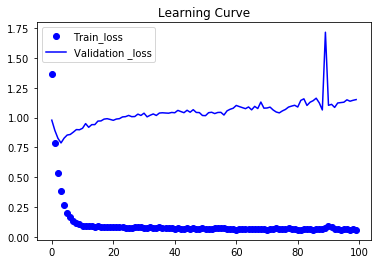

In [84]:
# 学習曲線

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(loss))

plt.plot(epochs, loss, "bo", label="Train_loss")
plt.plot(epochs, val_loss, "b", label="Validation _loss")
plt.title("Learning Curve")
plt.legend()

plt.show()

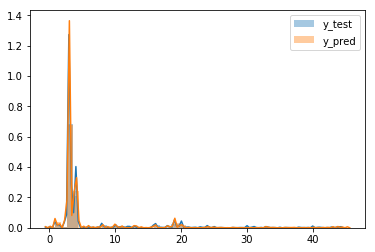

In [85]:
# 評価結果の可視化

sns.distplot(y_test, label="y_test")
sns.distplot(y_pred, label="y_pred")
plt.legend()

###

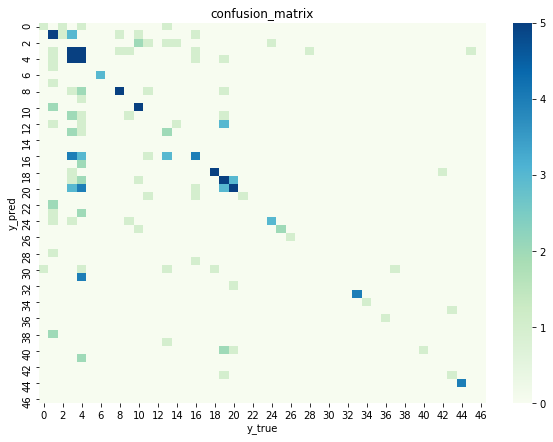

In [87]:
# 評価結果の可視化

labels = np.arange(num_class+1)  # 46値分類

cmx_data = confusion_matrix(y_test, y_pred, labels=labels)
df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

plt.figure(figsize = (10,7))
sns.heatmap(df_cmx, annot=False, cmap="GnBu", vmax=5)

plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("confusion_matrix")

plt.show()

#### 考察

- val_accuracyは0.82と相応に高く、正解値と予測値の分布は概ね整合しているように見える。
- 一方、仮説通り、学習曲線からモデルが過剰適合している様子が確認された。
- また、混同行列のヒートマップからは、頻度の大きい正解値3,4に対する予測値が3,4以外にも確認されており、学習用データの偏りを小さくする等の補正が必要かもしれない。

### Take away

1. Kerasの使い方
  - 複数のモデルを使用する際には、各処理実行後にセッションを終了すること(clear_session)。
  - RNNを用いる際は、インプットデータにシーケンスの次元があることを確認する。
    - シーケンスの次元が存在しない場合、sequence.pad_sequencesでシーケンスの次元を補完すること。
  - 正解ラベルを1次元配列の形で入力しない。
    - 正解ラベルを2次元配列に変換（reshape）せずに学習させると、エラーメッセージ（=レイヤーのshapeが合わない）が発生した。
    - Kerasには、1次元配列を自動的に2次元配列に変換する機能が備わっていない模様。
    - モデルとインプットデータの相性を考える。
      - conv2LSTMは、例えばMNISTのように（高さ、幅）の次元を持つデータを与えることが有用と思われる。
      
2. RNN
  - 今回のsprintを通じて、シンプルな設定でRNNを動かす場合、GPU環境を利用できるのであれば、精度や学習時間の観点から、CuDNNGRUもしくはCuDNNLSTMを利用することが有用だと分かった。
  - 一方、細かいチューニングが必要な場合は、個別にパラメータをチューニングしたCellsを組み合わせる必要があると思われる。